# Exploring Financial Data Using Nasdaq Data Link API
## Perform a detailed analysis of the financial data, including trend analysis and comparative studies. Utilize Python for data retreival, cleanig, and analysis, and create visualizations to present our findings effectively.

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import config
api_key = config.API_KEY

In [5]:
api_url= 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters={
    'api_key':api_key,
    'qopts.per_page':10
}

#Fetching data

json_data=requests.get(api_url, params=parameters).json()
print(json_data)




{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2022-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2022-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## Extract data and column names from the JSON response
## Processing the JSON Data into a DataFrame

In [12]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {
    'api_key':api_key,
    'qopts.per_page':10000
}

json_data = requests.get(api_url,params=parameters).json()
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived


In [13]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

## Understanding the Dataset

In [17]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']

## Filtering the DataFrame for Analysis

In [20]:
df_metric=df_metric[necessary_columns]
filtered_df=df_metric[df_metric['indicator']=='Accrued Expenses Turnover']
filtered_df['amount'].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

# Enhancing the DataFrame

In [22]:
def update_country_names(name):
    if name=='USA':
        name='United State of America'
    elif name=='JPN':
        name='Japan'
    elif name=='CYM':
        name='Cayman Islands'
    elif name=='BHS':
        name='Bahamas'
    elif name=='DEU':
        name='Germany'
    else:
        name='Ireland'
    return name
filtered_df=filtered_df.copy()
filtered_df['country_name']=filtered_df['country'].apply(update_country_names)
#update column names
filtered_df.columns=['report_id','report_date','report_type','amount','company_name','country','region','indicator','statement','country_name']
updated_df = filtered_df.copy()
updated_df['country_name'].value_counts()

United State of America    31
Ireland                    29
Japan                      27
Cayman Islands             27
Bahamas                    19
Germany                     6
Name: country_name, dtype: int64

## Understanding financial trends over time. Time period filtering from 2010-2015.

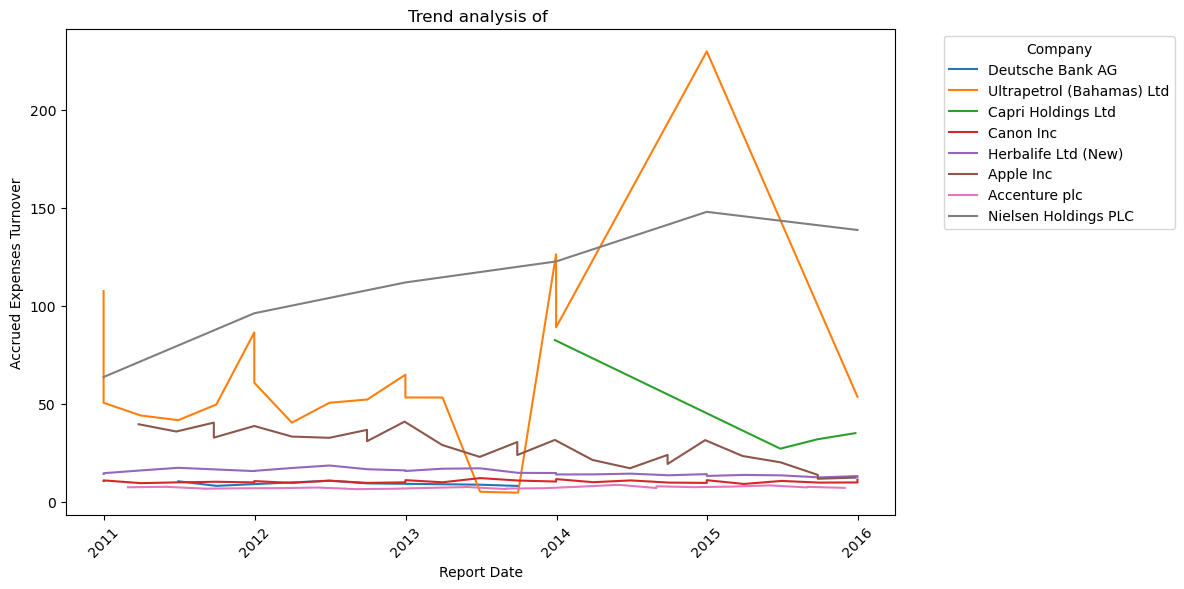

In [27]:
#convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date']=pd.to_datetime(updated_df['report_date'])
updated_df=updated_df[(updated_df['report_date'].dt.year>=2010) & (updated_df['report_date'].dt.year<=2015)]

relevant_columns=['company_name','report_date','amount']
relevant_data=updated_df[relevant_columns].copy()

plt.figure(figsize=(12, 6))

for company in relevant_data['company_name'].unique():
    company_data=relevant_data[relevant_data['company_name']==company]
    plt.plot(company_data['report_date'], company_data['amount'], label = company)

plt.title("Trend analysis of ")
plt.xlabel("Report Date")
plt.ylabel("Accrued Expenses Turnover")
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Geographical Region Analysis

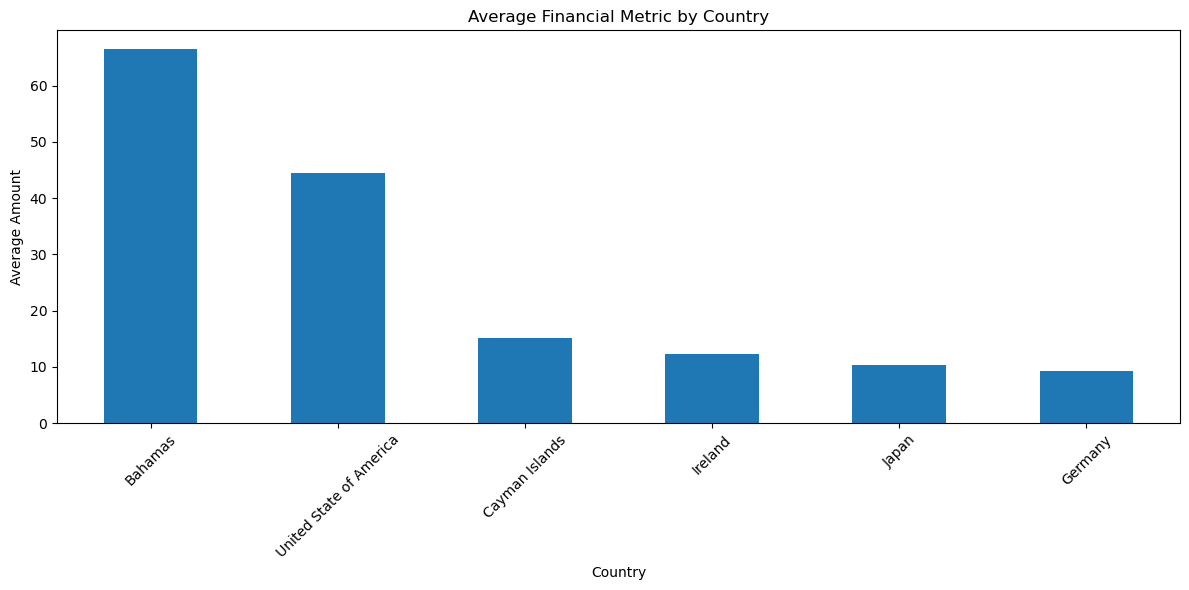

In [29]:
country_avg = updated_df.groupby('country_name')['amount'].mean()
plt.figure(figsize=(12,6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
